In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/dataset_final.csv')

In [ ]:
df.head()

,Unnamed: 0,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,traffic,securite,accident,retard,rating
0,0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,18.5436,2018,7,31,Tuesday,21,31,31,Tuesday,22,38,1,7,4,Voiture,1,1,0,0,5
1,1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,80.6420,2018,4,29,Sunday,11,12,29,Sunday,15,2,3,50,2,Voiture,2,1,1,1,1
2,2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,194.8008,2018,7,15,Sunday,6,24,16,Monday,1,53,19,29,35,autocar,1,1,1,1,2
3,3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,81.2457,2018,12,5,Wednesday,6,0,5,Wednesday,15,33,9,33,20,autocar,1,1,1,1,2
4,4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,142.7762,2018,5,23,Wednesday,15,30,23,Wednesday,21,9,5,39,4,Voiture,0,1,1,1,2


In [ ]:
df.drop(['Unnamed: 0','Ville de depart',"Ville d'arrivée",'traffic','securite','accident','retard'],axis=1,inplace=True)

In [ ]:
df

,Id_User,Latitude,Longitude,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,rating
0,74517,34.022405,-6.834543,33.595063,-7.618777,92.718000,18.54360,2018,7,31,Tuesday,21,31,31,Tuesday,22,38,1,7,4,Voiture,5
1,90486,33.595063,-7.618777,34.230155,-4.010104,403.209999,80.64200,2018,4,29,Sunday,11,12,29,Sunday,15,2,3,50,2,Voiture,1
2,69046,32.935772,-5.669650,30.422037,-9.559509,649.335999,194.80080,2018,7,15,Sunday,6,24,16,Monday,1,53,19,29,35,autocar,2
3,86417,34.022405,-6.834543,35.570175,-5.374278,270.819000,81.24570,2018,12,5,Wednesday,6,0,5,Wednesday,15,33,9,33,20,autocar,2
4,79358,30.920193,-6.910923,33.917166,-6.923804,509.914999,142.77620,2018,5,23,Wednesday,15,30,23,Wednesday,21,9,5,39,4,Voiture,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688714,76634,30.920193,-6.910923,30.422037,-9.559509,357.970001,71.59400,2018,8,21,Saturday,10,36,21,Saturday,15,17,4,41,2,Voiture,2
688715,93023,33.830287,-6.072605,42.651545,-1.309065,68.360000,19.14080,2018,8,11,Saturday,22,0,11,Saturday,22,49,0,49,3,Voiture,3
688716,99781,36.860370,6.925006,34.230155,-4.010104,499.383999,224.72280,2018,3,31,Saturday,21,17,1,Sunday,6,29,9,12,12,CTM,2
688717,93331,42.651545,-1.309065,36.860370,6.925006,339.399000,95.03172,2019,3,18,Monday,9,30,18,Monday,12,41,3,11,4,Voiture,2


In [ ]:
from sklearn import preprocessing
import numpy as np
# Import the encoder from sklearn
le = preprocessing.LabelEncoder()

# Encode the features
df['encoded_weekday_name_dep']=le.fit_transform(df['weekday_name_dep'])
df['encoded_weekday_name_arr']=le.fit_transform(df['weekday_name_arr'])
df['encoded_Moyen_de_transport']=le.fit_transform(df['Moyen_de_transport'])

In [ ]:
df.drop(['weekday_name_dep',"weekday_name_arr",'Moyen_de_transport'],axis=1,inplace=True)

In [ ]:
df.head()

,Id_User,Latitude,Longitude,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,Hour_dep,minute_dep,day_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,rating,encoded_weekday_name_dep,encoded_weekday_name_arr,encoded_Moyen_de_transport
0,74517,34.022405,-6.834543,33.595063,-7.618777,92.718000,18.5436,2018,7,31,21,31,31,22,38,1,7,4,5,5,5,1
1,90486,33.595063,-7.618777,34.230155,-4.010104,403.209999,80.6420,2018,4,29,11,12,29,15,2,3,50,2,1,3,3,1
2,69046,32.935772,-5.669650,30.422037,-9.559509,649.335999,194.8008,2018,7,15,6,24,16,1,53,19,29,35,2,3,1,2
3,86417,34.022405,-6.834543,35.570175,-5.374278,270.819000,81.2457,2018,12,5,6,0,5,15,33,9,33,20,2,6,6,2
4,79358,30.920193,-6.910923,33.917166,-6.923804,509.914999,142.7762,2018,5,23,15,30,23,21,9,5,39,4,2,6,6,1


In [ ]:
df1=df[['Id_User','Latitude','Longitude','Latitude.1','Longitude.1','Distance','prix','Year_dep','Month_dep','day_dep','encoded_weekday_name_dep','Hour_dep','minute_dep','day_arr','encoded_weekday_name_arr','Hour_arr','minute_arr','hour_duree','minute_duree','nombre_place','encoded_Moyen_de_transport','rating']]

In [ ]:
df1

,Id_User,Latitude,Longitude,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,encoded_weekday_name_dep,Hour_dep,minute_dep,day_arr,encoded_weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,encoded_Moyen_de_transport,rating
0,74517,34.022405,-6.834543,33.595063,-7.618777,92.718000,18.54360,2018,7,31,5,21,31,31,5,22,38,1,7,4,1,5
1,90486,33.595063,-7.618777,34.230155,-4.010104,403.209999,80.64200,2018,4,29,3,11,12,29,3,15,2,3,50,2,1,1
2,69046,32.935772,-5.669650,30.422037,-9.559509,649.335999,194.80080,2018,7,15,3,6,24,16,1,1,53,19,29,35,2,2
3,86417,34.022405,-6.834543,35.570175,-5.374278,270.819000,81.24570,2018,12,5,6,6,0,5,6,15,33,9,33,20,2,2
4,79358,30.920193,-6.910923,33.917166,-6.923804,509.914999,142.77620,2018,5,23,6,15,30,23,6,21,9,5,39,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688714,76634,30.920193,-6.910923,30.422037,-9.559509,357.970001,71.59400,2018,8,21,2,10,36,21,2,15,17,4,41,2,1,2
688715,93023,33.830287,-6.072605,42.651545,-1.309065,68.360000,19.14080,2018,8,11,2,22,0,11,2,22,49,0,49,3,1,3
688716,99781,36.860370,6.925006,34.230155,-4.010104,499.383999,224.72280,2018,3,31,2,21,17,1,3,6,29,9,12,12,0,2
688717,93331,42.651545,-1.309065,36.860370,6.925006,339.399000,95.03172,2019,3,18,1,9,30,18,1,12,41,3,11,4,1,2


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
X = df1.iloc[:,0:21].values
y = df1.iloc[:,21].values
print('The independent features set: ')
print(X[:,0:21])
print('The dependent variable: ')
print(y[:21])

The independent features set: 
[[ 7.45170000e+04  3.40224050e+01 -6.83454300e+00 ...  7.00000000e+00
   4.00000000e+00  1.00000000e+00]
 [ 9.04860000e+04  3.35950627e+01 -7.61877680e+00 ...  5.00000000e+01
   2.00000000e+00  1.00000000e+00]
 [ 6.90460000e+04  3.29357718e+01 -5.66965040e+00 ...  2.90000000e+01
   3.50000000e+01  2.00000000e+00]
 ...
 [ 9.97810000e+04  3.68603699e+01  6.92500616e+00 ...  1.20000000e+01
   1.20000000e+01  0.00000000e+00]
 [ 9.33310000e+04  4.26515447e+01 -1.30906530e+00 ...  1.10000000e+01
   4.00000000e+00  1.00000000e+00]
 [ 6.81080000e+04  3.42301550e+01 -4.01010400e+00 ...  4.30000000e+01
   2.20000000e+01  2.00000000e+00]]
The dependent variable: 
[5 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 5 2 1 2 2]


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def get_score(clf,X_train,X_test,y_train,y_test):
  clf.fit(X_train,y_train)
  return clf.score(X_test,y_test)

In [ ]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test= min_max_scaler.fit_transform(X_test)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


y_pred=clf.predict(X_test)

In [ ]:
clf.score(X_train,y_train)

0.9991868957463447

In [ ]:
clf.score(X_test,y_test)

0.977828435358346

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.977828435358346


In [ ]:
#validation croisée
score_clf=[]
kf= KFold(n_splits=5)
clf=RandomForestClassifier(n_estimators=10)
for train_index,test_index,in kf.split(X):
    X_train,X_test,y_train,y_test= X[train_index],X[test_index],y[train_index],y[test_index]
    print(get_score(clf,X_train,X_test,y_train,y_test))

0.9779808920896736
0.978743175746312
0.9780752700662098
0.9780680102218609
0.9778210144980144


0 5


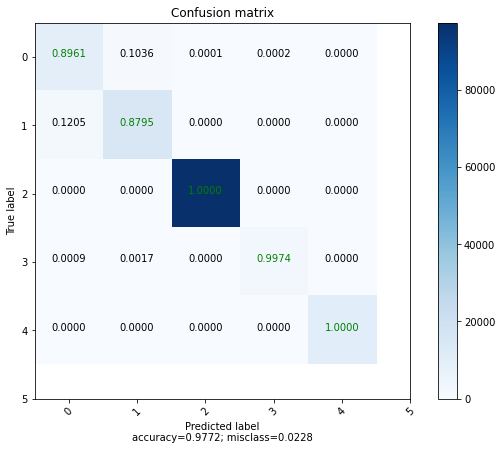

In [ ]:
import itertools 
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="green" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="green" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

y_pred =clf.predict(X_test)

print(y_pred.min(),y_pred.max())
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,range(y_test.min(),y_test.max()+1),normalize=True)

In [ ]:
column=['Id_User','Latitude','Longitude','Latitude.1','Longitude.1','Distance','prix','Year_dep','Month_dep','day_dep','encoded_weekday_name_dep','Hour_dep','minute_dep','day_arr','encoded_weekday_name_arr','Hour_arr','minute_arr','hour_duree','minute_duree','nombre_place','encoded_Moyen_de_transport']

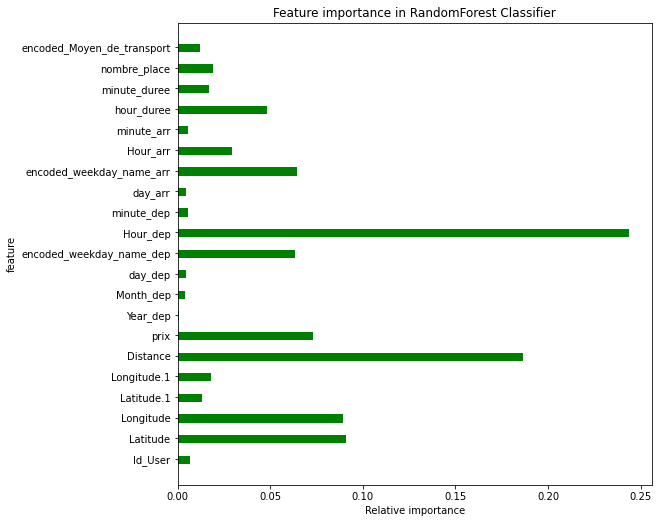

<Figure size 576x432 with 0 Axes>

In [ ]:
#modelname.feature_importance
import matplotlib.pyplot as plt
imp= clf.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(imp)) # the x locations for the groups
ax.barh(ind, imp, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(column, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.ylabel('feature') 
plt.xlabel('Relative importance')
plt.figure(figsize=(8,6))
fig.set_size_inches(8.5, 8.5, forward=True)

In [ ]:
target=['rating']